<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-8/Session-8/Assignment-8/EVA_4_S8_Praveen_Raghuvanshi_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test

### 1. Mount google drive

In [4]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 2. Set the directory path of google drive

In [0]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('/content/drive/My Drive/eva-4/assignment-8')

In [6]:
cd '/content/drive/My Drive/eva-4/assignment-8'

/content/drive/My Drive/eva-4/assignment-8


In [7]:
ls

checkpoint/  data/  model.py  __pycache__/  S8_functions.py  utils.py


### 3. Import all modules and libraries

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

### 4. Set Device

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from S8_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test
from model import Net, ResNet, resnet18

###  6. Load Transformations

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [12]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [13]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck horse plane horse


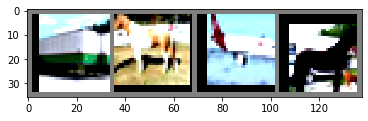

In [14]:
display(4, trainloader, classes)

### 10. Load Resnet18 Model


In [15]:
print("Building Model")
net = resnet18()

Building Model


In [16]:
# Display Model Summary
!pip install torchsummary
from torchsummary import summary

model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### 11. Define loss function and optimizer


In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 12. Run Train and Test

In [18]:
for epoch in range(10):
    train(net, trainloader, device, optimizer, criterion, epoch)
    test(net, testloader, device, criterion, epoch)


Epoch: 0
 [================================================================>]  Step: 26ms | Tot: 5m43s | Train >> Loss: 1.567 | Acc: 43.442% (21721/50000) 12500/12500 
 [================================================================>]  Step: 15ms | Tot: 48s33ms | Test >> Loss: 1.093 | Acc: 61.430% (6143/10000) 2500/2500 

Epoch: 1
 [================================================================>]  Step: 26ms | Tot: 5m34s | Train >> Loss: 0.995 | Acc: 64.882% (32441/50000) 12500/12500 
 [================================================================>]  Step: 15ms | Tot: 47s357ms | Test >> Loss: 0.807 | Acc: 73.140% (7314/10000) 2500/2500 

Epoch: 2
 [================================================================>]  Step: 22ms | Tot: 5m35s | Train >> Loss: 0.780 | Acc: 72.752% (36376/50000) 12500/12500 
 [================================================================>]  Step: 22ms | Tot: 46s891ms | Test >> Loss: 0.691 | Acc: 76.680% (7668/10000) 2500/2500 

Epoch: 3
 [========

### 13. Analysis
- No of Epochs : 9
- Best Train Acc: 87.184%
- Best Test  Acc: 86.560%
- Epoch 8 Acccuracy
  - Train : 86.164%
  - Test  : 86.560%
- Overfitting 
  - Calculation: (100 - 86.560) + 86.164 = 99.604 --> No Overfitting
  - Difference : 86.164 - 86.560 = -0.396 --> Less -> No overfitting